# Introduction #

In [2]:
import matplotlib.pyplot as plt
from learntools.deep_learning_intro.dltools import animate_sgd

plt.style.use('seaborn-v0_8-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [3]:
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex3 import *

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('../input/dl-course-data/fuel.csv')

X = fuel.copy()
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) 

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [8]:
fuel.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [9]:
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

# 1) Add Loss and Optimizer

In [12]:
model.compile(
    optimizer='adam',
    loss='mae'
)

q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

# 2) Train Model


In [15]:
history = history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

q_2.check()

Epoch 1/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0251
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0259
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0285
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0273
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0279
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0296
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0261
Epoch 11/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0274
Epoch 13/200
9/9 [==============================] - 0s 3ms/st

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

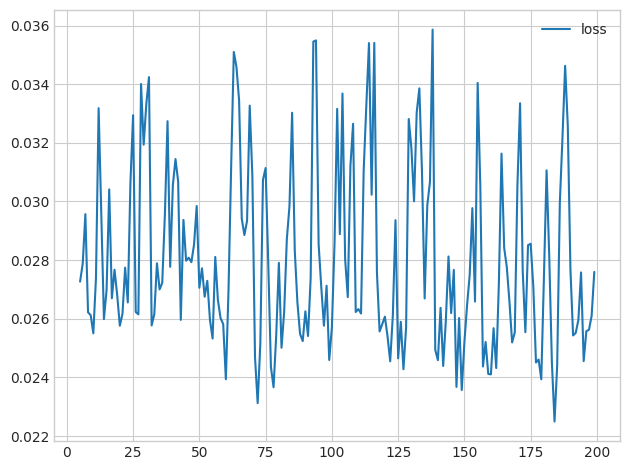

In [17]:
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot();

# 3) Evaluate Training

In [18]:
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

This depends on how the loss has evolved during training: if the learning curves have levelled off, there won't usually be any advantage to training for additional epochs.  Conversely, if the loss appears to still be decreasing, then training for longer could be advantageous.

In [19]:
learning_rate = 0.05
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    steps=50,
    true_w=3.0,
    true_b=2.0,
)

# 4) Learning Rate and Batch Size

In [20]:
q_4.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 


You probably saw that smaller batch sizes gave noisier weight updates and loss curves. This is because each batch is a small *sample* of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial.

Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely. (Try setting the learning rate to a large value like 0.99 to see this.)
